## ASEN6008 HW6

# Imports

In [1]:
from astro_constants import EARTH
import imd
from statistics import median
import numpy as np
import matplotlib.pyplot as plt

# Conditions besides Resonant Orbit

In [2]:
#state the dates
E_launch_date = 2447814
VGA_date = 2447932
EGA1_date = 2448235
EGA2_date = 2448965.484378
J_date = 2450154

#use the dates given for everything and find their positions
E_launch_pos,E_launch_vel = imd.ephem('Earth',E_launch_date)
V_pos,V_vel = imd.ephem('Venus',VGA_date)
E1_pos,E1_vel = imd.ephem('Earth',EGA1_date)
E2_pos,E2_vel = imd.ephem('Earth',EGA2_date)
J_pos,J_vel = imd.ephem('Jupiter',J_date)


#find the velocities at each point of the orbit(s)
v_E_launch,v_VGA_in,*_ = imd.ls(E_launch_pos,V_pos,VGA_date-E_launch_date)
v_VGA_out,v_EGA1_in,*_ = imd.ls(V_pos,E1_pos,EGA1_date-VGA_date)
v_EGA2_out,v_J,*_ = imd.ls(E2_pos,J_pos,J_date-EGA2_date)
vinf_EGA1_in = v_EGA1_in - E1_vel
vinf_EGA2_out = v_EGA2_out - E2_vel
print(vinf_EGA1_in.transpose())
print(vinf_EGA2_out.transpose())

[-0.39239878 -8.79515116  1.70512322]
[-8.95537049 -0.27778293 -0.40258422]


# Find Acceptable Region of Phi

min phi: 73.2
max phi: 114.4
Optimal phi: 93.8
Altitude 1: 3329.0
Altitude 2: 687.7


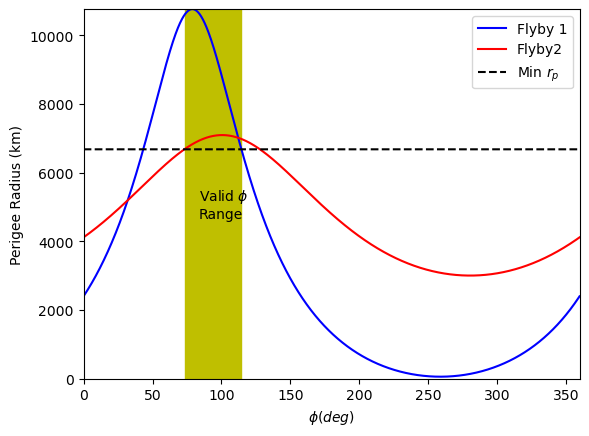

In [3]:
rE = EARTH['radius']
alt = 300
E1_sv = np.concatenate((E1_pos, E1_vel))
E2_sv = np.concatenate((E2_pos, E2_vel))
rp1,rp2,phi,*_ = imd.res_orb(vinf_EGA1_in, E1_sv, vinf_EGA2_out, E2_sv, EARTH, min_r=rE+alt, XY=2, plot=True)

print(f'min phi: {min(phi):.1f}\nmax phi: {max(phi):.1f}')
print(f'Optimal phi: {median(phi):.1f}')
print(f'Altitude 1: {rp1[phi.index(median(phi))]-rE:.1f}')
print(f'Altitude 2: {rp2[phi.index(median(phi))]-rE:.1f}')
plt.show()